<a href="https://colab.research.google.com/github/EduardoYaguar/act1_2p_si_eda_2_25_yaguar/blob/main/act2_2p_si_tech_2_25_yaguar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

# Load and check data

In [2]:
df = pd.read_csv('diabetic_data_cleaned.csv')
df.shape

(101766, 50)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Preparation

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()

print(f'\nNumber of categorical cols: {len(categorical_cols)}')
print(f'\n {categorical_cols}')
print(f'\nNumber of categorical cols: {len(numeric_cols)}')
print(f'\n {numeric_cols}')


Number of categorical cols: 37

 ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Number of categorical cols: 13

 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [5]:
df_model = df.copy()
columns_to_drop = [
    'encounter_id',
    'patient_nbr',
    'weight',
    'payer_code',
    'medical_specialty',
    'diag_1',
    'diag_2',
    'diag_3',
    'A1Cresult',
    'max_glu_serum',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
]
df_model = df_model.drop(columns=columns_to_drop)
df_model.shape

(101766, 20)

In [6]:
X = df_model.drop('readmitted', axis=1)
y = df_model['readmitted']
print(f'Features (X): {X.shape}')
print(f'Target (y): {y.shape}')

Features (X): (101766, 19)
Target (y): (101766,)


# Label Encoding (Ordinal Variables)

In [7]:
X_encoded = X.copy()
X_encoded['age_encoded'] = LabelEncoder().fit_transform(X['age'])
X_encoded = X_encoded.drop('age', axis = 1)


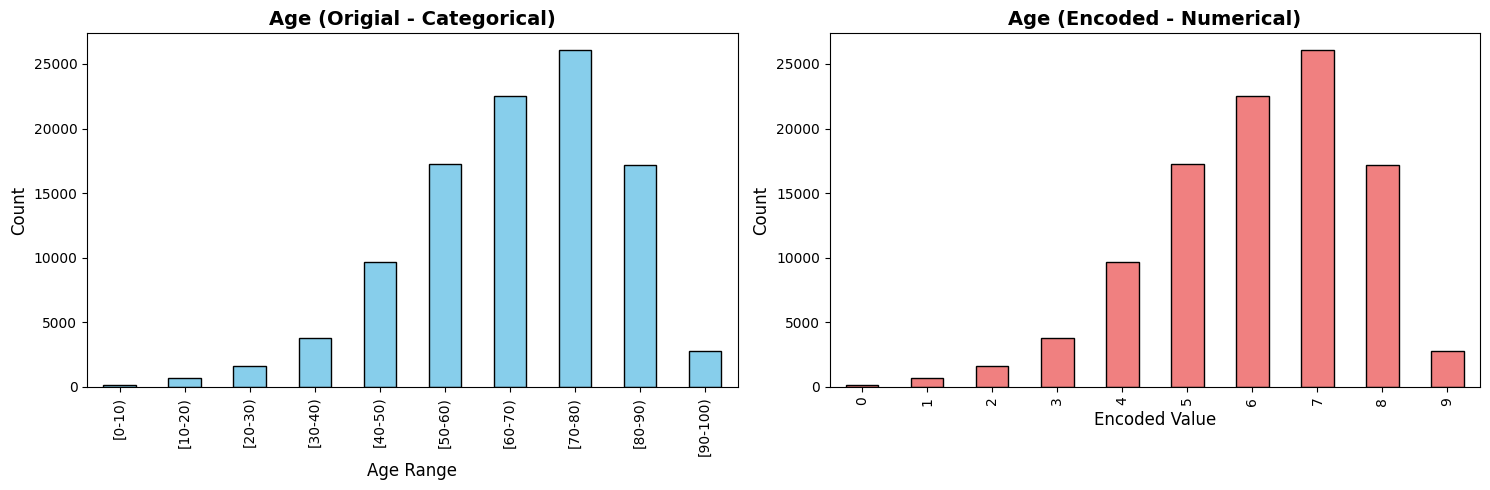

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

X['age'].value_counts().sort_index().plot(kind = 'bar', ax=axes[0], color = 'skyblue', edgecolor = 'black')
axes[0].set_title('Age (Origial - Categorical)', fontsize = 14, fontweight = 'bold')
axes[0].set_xlabel('Age Range', fontsize = 12)
axes[0].set_ylabel('Count', fontsize = 12)

X_encoded['age_encoded'].value_counts().sort_index().plot(kind = 'bar', ax=axes[1], color = 'lightcoral', edgecolor = 'black')
axes[1].set_title('Age (Encoded - Numerical)', fontsize = 14, fontweight = 'bold')
axes[1].set_xlabel('Encoded Value', fontsize = 12)
axes[1].set_ylabel('Count', fontsize = 12)

plt.tight_layout()
plt.show()

In [9]:
X_encoded['insulin_encoded'] = LabelEncoder().fit_transform(X['insulin'])
X_encoded = X_encoded.drop('insulin', axis = 1)

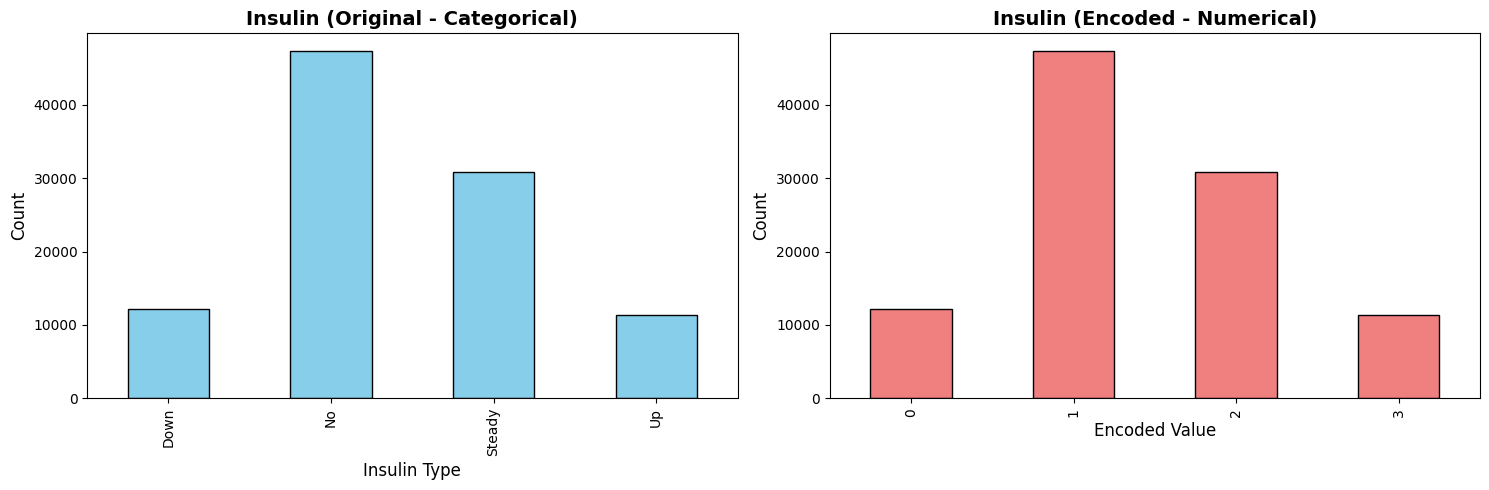

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
X['insulin'].value_counts().sort_index().plot(kind = 'bar', ax = axes[0], color = 'skyblue', edgecolor = 'black')
axes[0].set_title('Insulin (Original - Categorical)', fontsize = 14, fontweight = 'bold')
axes[0].set_xlabel('Insulin Type', fontsize = 12)
axes[0].set_ylabel('Count', fontsize = 12)

X_encoded['insulin_encoded'].value_counts().sort_index().plot(kind = 'bar', ax = axes[1], color = 'lightcoral', edgecolor = 'black')
axes[1].set_title('Insulin (Encoded - Numerical)', fontsize = 14, fontweight = 'bold')
axes[1].set_xlabel('Encoded Value', fontsize = 12)
axes[1].set_ylabel('Count', fontsize = 12)

plt.tight_layout()
plt.show()

#One-Hot Encoding (Nominal Variables)

In [11]:
nominal_cols = ['race', 'gender', 'change', 'diabetesMed']
X_onehot = pd.get_dummies(X_encoded, columns= nominal_cols, drop_first = True, prefix = nominal_cols)

print(f'Shape before one-hot encoding: {X_encoded.shape}')
print(f'Shape after one-hot encoding: {X_onehot.shape}')

Shape before one-hot encoding: (101766, 19)
Shape after one-hot encoding: (101766, 24)


In [12]:
new_cols = [col for col in X_onehot.columns if any(prefix in col for prefix in nominal_cols)]
for col in new_cols:
    print(col)


race_Asian
race_Caucasian
race_Hispanic
race_Other
race_unknown
gender_Male
gender_Unknown/Invalid
change_No
diabetesMed_Yes


In [13]:
X_onehot.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_encoded,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_unknown,gender_Male,gender_Unknown/Invalid,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,1,False,True,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,3,False,True,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,1,False,False,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,3,False,True,False,False,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,2,False,True,False,False,False,True,False,False,True
